In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/sample_submission.csv
/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/freeway_train.csv
/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/road_train.csv
/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/road/test/road_0190/00030.jpg
/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/road/test/road_0190/00009.jpg
/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/road/test/road_0190/00023.jpg
/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/road/test/road_0190/00037.jpg
/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/road/test/road_0190/00020.jpg
/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/road/test/road_0190/00004.jpg
/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/road/test/road_0190/00022.jpg
/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2e

In [2]:
df_freeway = pd.read_csv("/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/freeway_train.csv")
df_freeway.head()

file_name  risk
0  freeway_0000     0
1  freeway_0001     0
2  freeway_0002     0
3  freeway_0003     0
4  freeway_0004     0

In [3]:
len(df_freeway)

180

In [4]:
df_road = pd.read_csv("/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/road_train.csv")
df_road.head()


file_name  risk
0  road_0000     0
1  road_0001     0
2  road_0002     0
3  road_0003     1
4  road_0004     1

In [5]:
import os
def walk_through_dir(dir_path):
    dict_images = {}
    for dirpath, dirnames, filenames in os.walk(dir_path):
        for dirname in dirnames:
            sub_dir_path = dir_path+dirname
            list_images = []
            for sub_dir_path,_,images in os.walk(sub_dir_path):
                for image in images:
                    image_path = sub_dir_path+"/"+image
                    list_images.append(image_path)
            dict_images[dirname] = list_images
    
    return dict_images

In [6]:
dict_freeway_images = walk_through_dir("/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/freeway/train/")
len(dict_freeway_images)

180

In [7]:
dict_road_images = walk_through_dir("/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/road/train/")
len(dict_road_images)

179

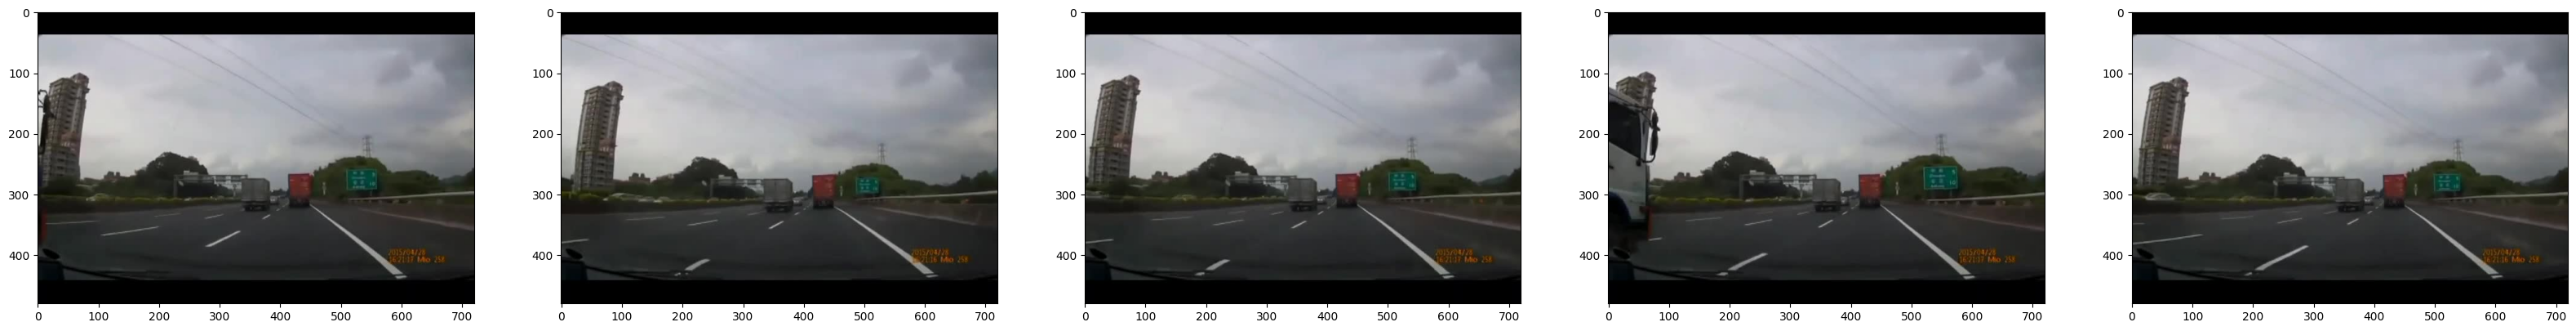

In [8]:
import cv2
import matplotlib.pyplot as plt

freeway_key_0 = list(dict_freeway_images.keys())[0]
fig = plt.figure(figsize=(40,20))
for i in range(5):
    fig.add_subplot(1,5,i+1)
    img_freeway=cv2.imread(dict_freeway_images[freeway_key_0][i])
    rgb_img_freeway = cv2.cvtColor(img_freeway, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img_freeway)

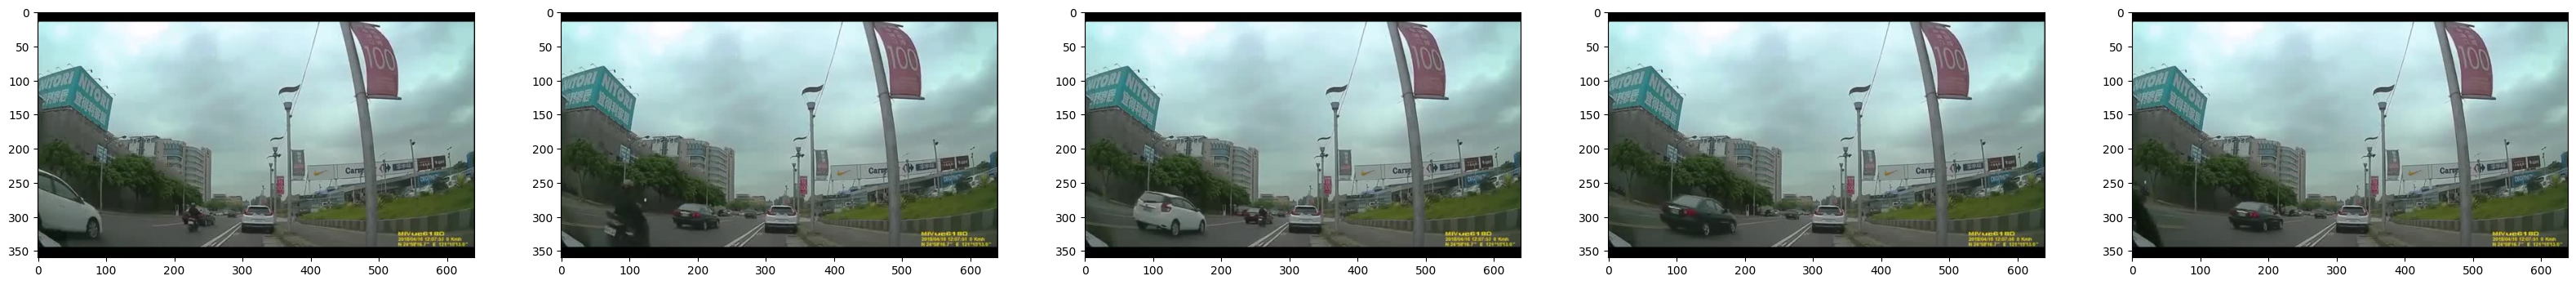

In [9]:
road_key_0 = list(dict_road_images.keys())[0]
fig = plt.figure(figsize=(40,20))
for i in range(5):
    fig.add_subplot(1,5,i+1)
    img_road=cv2.imread(dict_road_images[road_key_0][i])
    rgb_img_road = cv2.cvtColor(img_road, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img_road)

In [10]:
sorted_dict_freeway_images = dict(sorted(dict_freeway_images.items()))
print(list(sorted_dict_freeway_images.keys())[1])

freeway_0001


In [11]:
images = []
file_name = []
risk = []

freeway_i = 0
for freeway_key in sorted_dict_freeway_images.keys():
    for freeway_url in sorted_dict_freeway_images[freeway_key]:
        images.append(freeway_url)
        file_name.append(df_freeway.loc[freeway_i]["file_name"])
        risk.append(df_freeway.loc[freeway_i]["risk"])
    freeway_i = freeway_i + 1

In [12]:
sorted_dict_road_images = dict(sorted(dict_road_images.items()))
print(list(sorted_dict_road_images.keys())[1])

road_0001


In [13]:
road_i = 0
for road_key in sorted_dict_road_images.keys():
    for road_url in sorted_dict_road_images[road_key]:
        images.append(road_url)
        file_name.append(df_road.loc[road_i]["file_name"])
        risk.append(df_road.loc[road_i]["risk"])
    road_i = road_i + 1

In [14]:
len(images)

28049

In [15]:
data = {
  "images": images,
  "file_name": file_name,
  "risk": risk
}

df = pd.DataFrame(data)

df.head()

images     file_name  risk
0  /kaggle/input/2nd-ava-challenge-ieee-mipr-2024...  freeway_0000     0
1  /kaggle/input/2nd-ava-challenge-ieee-mipr-2024...  freeway_0000     0
2  /kaggle/input/2nd-ava-challenge-ieee-mipr-2024...  freeway_0000     0
3  /kaggle/input/2nd-ava-challenge-ieee-mipr-2024...  freeway_0000     0
4  /kaggle/input/2nd-ava-challenge-ieee-mipr-2024...  freeway_0000     0

In [16]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [17]:
import torchvision
weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B2_Weights.IMAGENET1K_V1

In [18]:
data_transforms = weights.transforms()
data_transforms

ImageClassification(
    crop_size=[288]
    resize_size=[288]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_0 = torchvision.models.efficientnet_b2(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-c35c1473.pth
100%|██████████| 35.2M/35.2M [00:02<00:00, 12.6MB/s]


In [20]:
from torch.utils.data import Dataset
from PIL import Image

class ImageDataset(Dataset):
    def __init__(self, images,risk, transform=None):
        self.images = images
        self.risk = risk
        self.transform = transform
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        target = torch.tensor([self.risk[idx]],dtype=torch.float32)
        #if self.risk[idx] == 1:
        #    target = torch.tensor([0.0,1.0],dtype=torch.float32)
        #else:
        #    target = torch.tensor([1.0,0.0],dtype=torch.float32)
        #target = self.risk[idx]
        img = Image.open(self.images[idx])
        if self.transform:
            image = self.transform(img)
        return image,target
        #return target

In [21]:
training_data = ImageDataset(list(df["images"]),list(df["risk"]),data_transforms)

In [22]:
len(training_data)

28049

In [23]:
img, target = training_data[0][0], training_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image target : {target}")
print(f"Label datatype: {type(target)}")
print(f"Label shape: {target.shape}")

Image tensor:
tensor([[[ 0.1768,  0.1768,  0.1768,  ...,  0.7762,  0.7762,  0.7762],
         [ 0.1768,  0.1768,  0.1768,  ...,  0.7762,  0.7762,  0.7762],
         [ 0.1768,  0.1768,  0.1768,  ...,  0.7762,  0.7762,  0.7762],
         ...,
         [-1.3815, -1.3815, -1.3815,  ..., -1.0219, -1.0219, -1.0219],
         [-1.3815, -1.3815, -1.3815,  ..., -1.0219, -1.0219, -1.0219],
         [-1.3815, -1.3815, -1.3815,  ..., -1.0219, -1.0219, -1.0219]],

        [[ 0.5903,  0.5903,  0.5903,  ...,  1.2731,  1.2731,  1.2731],
         [ 0.5903,  0.5903,  0.5903,  ...,  1.2731,  1.2731,  1.2731],
         [ 0.5903,  0.5903,  0.5903,  ...,  1.2731,  1.2731,  1.2731],
         ...,
         [-1.2829, -1.2829, -1.2829,  ..., -0.8978, -0.8978, -0.8978],
         [-1.2829, -1.2829, -1.2829,  ..., -0.8978, -0.8978, -0.8978],
         [-1.2829, -1.2829, -1.2829,  ..., -0.8978, -0.8978, -0.8978]],

        [[ 1.2108,  1.2108,  1.2108,  ...,  1.6814,  1.6814,  1.6814],
         [ 1.2108,  1.2108,  1.

In [24]:
random_seed= 42
validation_split = .2
dataset_size = len(training_data)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))

In [25]:
np.random.seed(random_seed)
np.random.shuffle(indices)

In [26]:
split

5609

In [27]:
train_indices, val_indices = indices[split:], indices[:split]

In [28]:
from torch.utils.data.sampler import SubsetRandomSampler

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

In [29]:
from torch.utils.data import DataLoader


batch_size = 32 #how many samples per batch?
num_workes = os.cpu_count() # how many subprocesses to use for data loading?
train_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, 
                                           sampler=train_sampler,num_workers=num_workes)
validation_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size,
                                                sampler=valid_sampler,num_workers=num_workes)

In [30]:
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 288, 288]), torch.Size([32, 1]))

In [31]:
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, 
        input_size=[32, 3, 288, 288],
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]) 

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 288, 288]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 288, 288]    [32, 1408, 9, 9]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 288, 288]    [32, 32, 144, 144]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 288, 288]    [32, 32, 144, 144]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 144, 144]   [32, 32, 144, 144]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 144, 144]   [32, 32, 144, 144]   --                   --
│    └─Sequential (1)                                        [32, 32, 144, 144]   [32, 16, 144

In [32]:
for param in model_0.features.parameters():
    param.requires_grad = False

In [33]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1408, 
                    out_features=1, 
                    bias=True)).to(device)

In [34]:
summary(model_0, 
        input_size=[32, 3, 288, 288],
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 288, 288]    [32, 1]              --                   Partial
├─Sequential (features)                                      [32, 3, 288, 288]    [32, 1408, 9, 9]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 288, 288]    [32, 32, 144, 144]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 288, 288]    [32, 32, 144, 144]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 144, 144]   [32, 32, 144, 144]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 144, 144]   [32, 32, 144, 144]   --                   --
│    └─Sequential (1)                                        [32, 32, 144, 144]   [32, 

In [35]:
from torch import nn
import torch.optim as optim

loss_fn = nn.BCEWithLogitsLoss() # mean square error
optimizer = optim.Adam(model_0.parameters(), lr=0.0001)

In [36]:
def checkpoint(model, filename):
    torch.save(model.state_dict(), filename)

In [37]:
def train_step(model,dataloader,loss_fn,optimizer,device):
    model.train()
    train_loss, train_acc = 0, 0
    for batch_train, (X_train, y_train) in enumerate(dataloader):
        X_train, y_train = X_train.to(device), y_train.to(device)
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = y_pred.round()
        train_acc += (y_pred_class == y_train).sum().item()/len(y_pred)
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [38]:
def test_step(model,dataloader,loss_fn,device):
    model.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for batch_test, (X_test, y_test) in enumerate(dataloader):
            X_test, y_test = X_test.to(device), y_test.to(device)
            test_pred_logits = model(X_test)
            loss = loss_fn(test_pred_logits, y_test)
            test_loss += loss.item()
            test_pred_labels = test_pred_logits.round()
            test_acc += ((test_pred_labels == y_test).sum().item()/len(test_pred_labels))
        
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [39]:
from tqdm.auto import tqdm

results = {"train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
}

#epochs = 10000  # more than we needed
epochs = 20
#early_stop_thresh = 5
best_accuracy = -1
#best_epoch = -1

for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model_0,
                                          dataloader=train_loader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
    
    test_loss, test_acc = test_step(model=model_0,
          dataloader=validation_loader,
          loss_fn=loss_fn,
          device=device)
    
    print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
    
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    
    test_acc = float(test_acc) * 100
    if test_acc > best_accuracy:
        best_accuracy = test_acc
        #best_epoch = epoch
        checkpoint(model_0, '/kaggle/working/best_model.pt')
    #elif epoch - best_epoch > early_stop_thresh:
        #print("Early stopped training at epoch %d" % epoch)
        #break  # terminate the training loop

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5596 | train_acc: 0.1135 | test_loss: 0.5272 | test_acc: 0.1338
Epoch: 2 | train_loss: 0.5039 | train_acc: 0.1100 | test_loss: 0.4833 | test_acc: 0.1634
Epoch: 3 | train_loss: 0.4717 | train_acc: 0.1214 | test_loss: 0.4526 | test_acc: 0.1622
Epoch: 4 | train_loss: 0.4497 | train_acc: 0.1314 | test_loss: 0.4265 | test_acc: 0.1919
Epoch: 5 | train_loss: 0.4322 | train_acc: 0.1487 | test_loss: 0.4084 | test_acc: 0.2001
Epoch: 6 | train_loss: 0.4135 | train_acc: 0.1513 | test_loss: 0.3888 | test_acc: 0.1724
Epoch: 7 | train_loss: 0.4044 | train_acc: 0.1556 | test_loss: 0.3776 | test_acc: 0.1988
Epoch: 8 | train_loss: 0.3943 | train_acc: 0.1596 | test_loss: 0.3626 | test_acc: 0.1892
Epoch: 9 | train_loss: 0.3852 | train_acc: 0.1636 | test_loss: 0.3513 | test_acc: 0.1971
Epoch: 10 | train_loss: 0.3768 | train_acc: 0.1579 | test_loss: 0.3383 | test_acc: 0.1771
Epoch: 11 | train_loss: 0.3695 | train_acc: 0.1571 | test_loss: 0.3301 | test_acc: 0.1957
Epoch: 12 | train_l

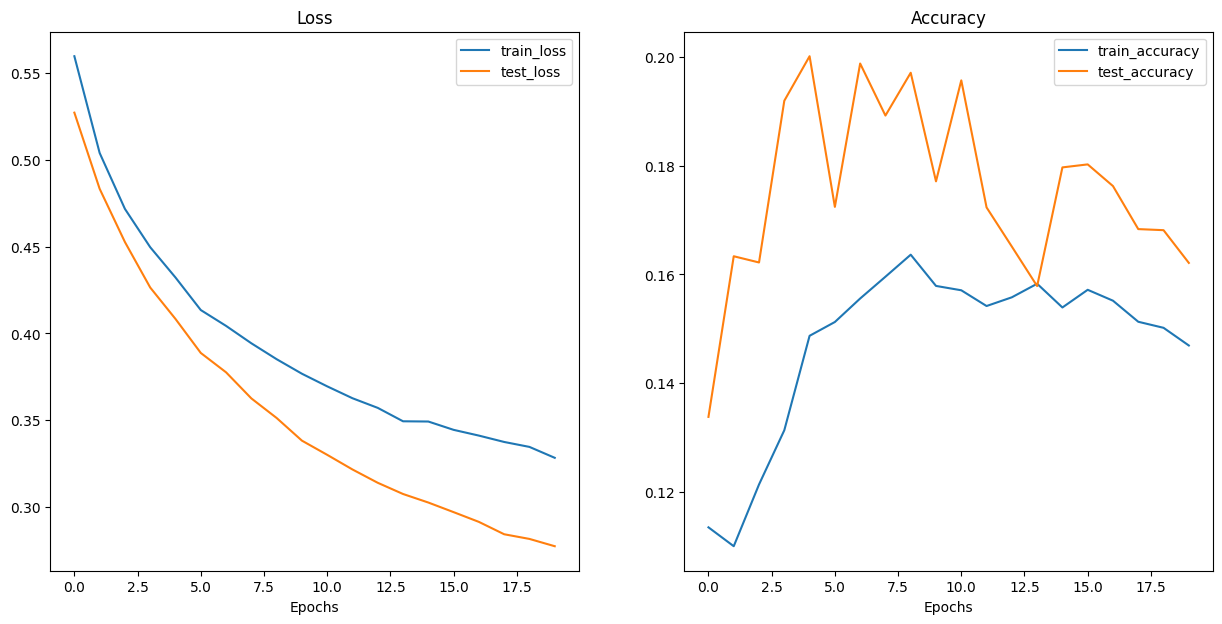

In [40]:
# Get the loss values of the results dictionary (training and test)
loss = results['train_loss']
test_loss = results['test_loss']

# Get the accuracy values of the results dictionary (training and test)
accuracy = results['train_acc']
test_accuracy = results['test_acc']

# Figure out how many epochs there were
epochs = range(len(results['train_loss']))

# Setup a plot 
plt.figure(figsize=(15, 7))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='train_loss')
plt.plot(epochs, test_loss, label='test_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='train_accuracy')
plt.plot(epochs, test_accuracy, label='test_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();

In [41]:
#dict_freeway_images_test = walk_through_dir("/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/freeway/test/")
#len(dict_freeway_images_test)

In [42]:
#dict_road_images_test = walk_through_dir("/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/road/test/")
#len(dict_road_images_test)

In [43]:
import glob
import pathlib

images_test = []
file_name_test = []

files_freeway_test = glob.glob('/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/freeway/test/**/*.jpg',  
                   recursive = True) 

for file_freeway in files_freeway_test: 
    images_test.append(file_freeway) 
    path_freeway = pathlib.PurePath(file_freeway)
    file_name_test.append(path_freeway.parent.name)

In [44]:
files_road_test = glob.glob('/kaggle/input/2nd-ava-challenge-ieee-mipr-2024/2nd_AVA_Dataset_2ed/road/test/**/*.jpg',  
                   recursive = True) 

for file_road in files_road_test: 
    images_test.append(file_road) 
    path_road = pathlib.PurePath(file_road)
    file_name_test.append(path_road.parent.name)

In [45]:
data_test = {
  "images": images_test,
  "file_name": file_name_test
}

df_test = pd.DataFrame(data_test)

df_test.head()

images     file_name
0  /kaggle/input/2nd-ava-challenge-ieee-mipr-2024...  freeway_0258
1  /kaggle/input/2nd-ava-challenge-ieee-mipr-2024...  freeway_0258
2  /kaggle/input/2nd-ava-challenge-ieee-mipr-2024...  freeway_0258
3  /kaggle/input/2nd-ava-challenge-ieee-mipr-2024...  freeway_0258
4  /kaggle/input/2nd-ava-challenge-ieee-mipr-2024...  freeway_0258

In [46]:
class ImageTestDataset(Dataset):
    def __init__(self, images,transform=None):
        self.images = images
        self.transform = transform
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        #target = torch.tensor([self.risk[idx]],dtype=torch.float32)
        #if self.risk[idx] == 1:
        #    target = torch.tensor([0.0,1.0],dtype=torch.float32)
        #else:
        #    target = torch.tensor([1.0,0.0],dtype=torch.float32)
        #target = self.risk[idx]
        img = Image.open(self.images[idx])
        if self.transform:
            image = self.transform(img)
        #return image,target
        #return target
        return image

In [47]:
testing_data = ImageTestDataset(list(df_test["images"]),data_transforms)

In [48]:
batch_size = 1 #how many samples per batch?
num_workes = os.cpu_count() # how many subprocesses to use for data loading?
submission_loader = torch.utils.data.DataLoader(testing_data, batch_size=batch_size, num_workers=num_workes)

In [49]:
model_0.load_state_dict(torch.load('/kaggle/working/best_model.pt'))

<All keys matched successfully>

In [50]:
submission_results_risk = []
model_0.eval()

with torch.inference_mode():
    for batch_test, (X_submission) in enumerate(submission_loader):
        X_submission = X_submission.to(device)
        y_pred_submission = model_0(X_submission)
        submission_results_risk.append(y_pred_submission.cpu().detach().numpy())

In [51]:
submission_risks = []
for result in submission_results_risk:
    submission_risks.append(result.squeeze().tolist())

In [52]:
df_test["risk"] = submission_risks

In [53]:
df_test.head()

images     file_name      risk
0  /kaggle/input/2nd-ava-challenge-ieee-mipr-2024...  freeway_0258 -0.532289
1  /kaggle/input/2nd-ava-challenge-ieee-mipr-2024...  freeway_0258 -1.427021
2  /kaggle/input/2nd-ava-challenge-ieee-mipr-2024...  freeway_0258 -1.212075
3  /kaggle/input/2nd-ava-challenge-ieee-mipr-2024...  freeway_0258 -0.178796
4  /kaggle/input/2nd-ava-challenge-ieee-mipr-2024...  freeway_0258 -0.758877

In [54]:
df_test = df_test.drop(['images'], axis=1)

In [55]:
df_test.head()

file_name      risk
0  freeway_0258 -0.532289
1  freeway_0258 -1.427021
2  freeway_0258 -1.212075
3  freeway_0258 -0.178796
4  freeway_0258 -0.758877

In [56]:
df_test_groupby = df_test.groupby(["file_name"], as_index=False).mean()

In [57]:
df_test_groupby

file_name      risk
0    freeway_0180 -0.089443
1    freeway_0181  0.049022
2    freeway_0182  0.064004
3    freeway_0183 -1.062607
4    freeway_0184 -0.448088
..            ...       ...
238     road_0295 -0.730993
239     road_0296 -0.742340
240     road_0297 -1.131729
241     road_0298 -0.941928
242     road_0299 -1.134029

[243 rows x 2 columns]

In [58]:
df_test_groupby.to_csv('/kaggle/working/submission.csv', index=False)